# Topology meets TPMS
## TPMS part

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

count_pount = 100 # количество генерируемых точек для поверхности. В дальнейшем залаваемый параметр
 
def generate_points(count_pount):
    one_axis = np.linspace(-np.pi, np.pi, count_pount)
    xyz_mesh = np.meshgrid(one_axis, one_axis, one_axis)
    x,y,z = xyz_mesh
    return x,y,z
    

# генерация случайных чисел для парметра d
size = 30
np.random.seed(1999)
d_param = sorted(np.random.uniform(low=-0.99, high=0.99, size=size))
print(d_param)



def generate_tpms_Schwarz_p(d_param):
    x,y,z = generate_points(count_pount)
    
    porosity_list = []
    pointcloud_list = []
    
    for i in range(len(d_param)):
        Schwarz_p = np.cos(x) + np.cos(y) + np.cos(z) + d_param[i] #эт формула поверхности Шварца
        tolerance = 0.001
        x0,y0,z0 = np.where(abs(Schwarz_p)<tolerance)
        pointcloud = np.vstack((x0,y0,z0)).T
        cube_volume = (np.min(x0) + np.max(x0)) * (np.min(y0) + np.max(y0)) * (np.min(z0) + np.max(z0)) #Объем кубика
        cloud = pv.PolyData(pointcloud)
        surface = cloud.reconstruct_surface() # Облако точек для расчета объема
        surface_volume = surface.volume # Объем поверхности
        porosity = (cube_volume-surface_volume)/surface_volume #расчитываем удельную пористость
        porosity_list.append(porosity)
        pointcloud_list.append(pointcloud)
        
    return porosity_list, pointcloud_list

porosity_list_Schwarz_p, pointcloud_list_Schwarz_p = generate_tpms_Schwarz_p(d_param)

def generate_tpms_Gyroid(d_param):
    x,y,z = generate_points(count_pount)
    
    porosity_list = []
    pointcloud_list = []
    for i in range(len(d_param)):
        Gyroid = np.cos(x)*np.sin(y) + np.cos(y)*np.sin(z) + np.cos(z)*np.sin(x) + d_param[i] #эт формула поверхности Геройда
        tolerance = 0.001
        x0,y0,z0 = np.where(abs(Gyroid)<tolerance)
        pointcloud = np.vstack((x0,y0,z0)).T
        cube_volume = (np.min(x0) + np.max(x0)) * (np.min(y0) + np.max(y0)) * (np.min(z0) + np.max(z0)) #Объем кубика
        cloud = pv.PolyData(pointcloud)
        surface = cloud.reconstruct_surface() # Облако точек для расчета объема
        surface_volume = surface.volume # Объем поверхности
        porosity = (cube_volume-surface_volume)/surface_volume #расчитываем удельную пористость
        porosity_list.append(porosity)
        pointcloud_list.append(pointcloud)
    return porosity_list, pointcloud_list

porosity_list_Gyroid, pointcloud_list_Gyroid = generate_tpms_Gyroid(d_param)

[-0.9850857963678311, -0.8343366615126921, -0.7463244532435692, -0.602925211425586, -0.47958702941652886, -0.43776187070576, -0.41136858767030715, -0.35709910913454423, -0.35088529180876293, -0.32964127267370724, -0.2623206879754544, -0.08615109294964762, 0.18464827439927678, 0.27200298758254116, 0.4294859077816455, 0.44617777626215216, 0.4578855036043936, 0.465394608817425, 0.583935658785212, 0.6425499439208111, 0.6623205758437742, 0.7132291852184753, 0.7213150183216164, 0.7784261431370918, 0.8433895374071456, 0.8677782656328097, 0.873779300317322, 0.953246239519624, 0.9595609819109678, 0.9629671327983598]


## Topology part

In [70]:
import gudhi as gd

### Schwarz TPMSs

In [71]:
dgms = [None] * size
for i, pc in enumerate(pointcloud_list_Gyroid):
    ac = gd.AlphaComplex(points=pc)
    stree = ac.create_simplex_tree()
    dgm = stree.persistence()
    dgms[i] = dgm

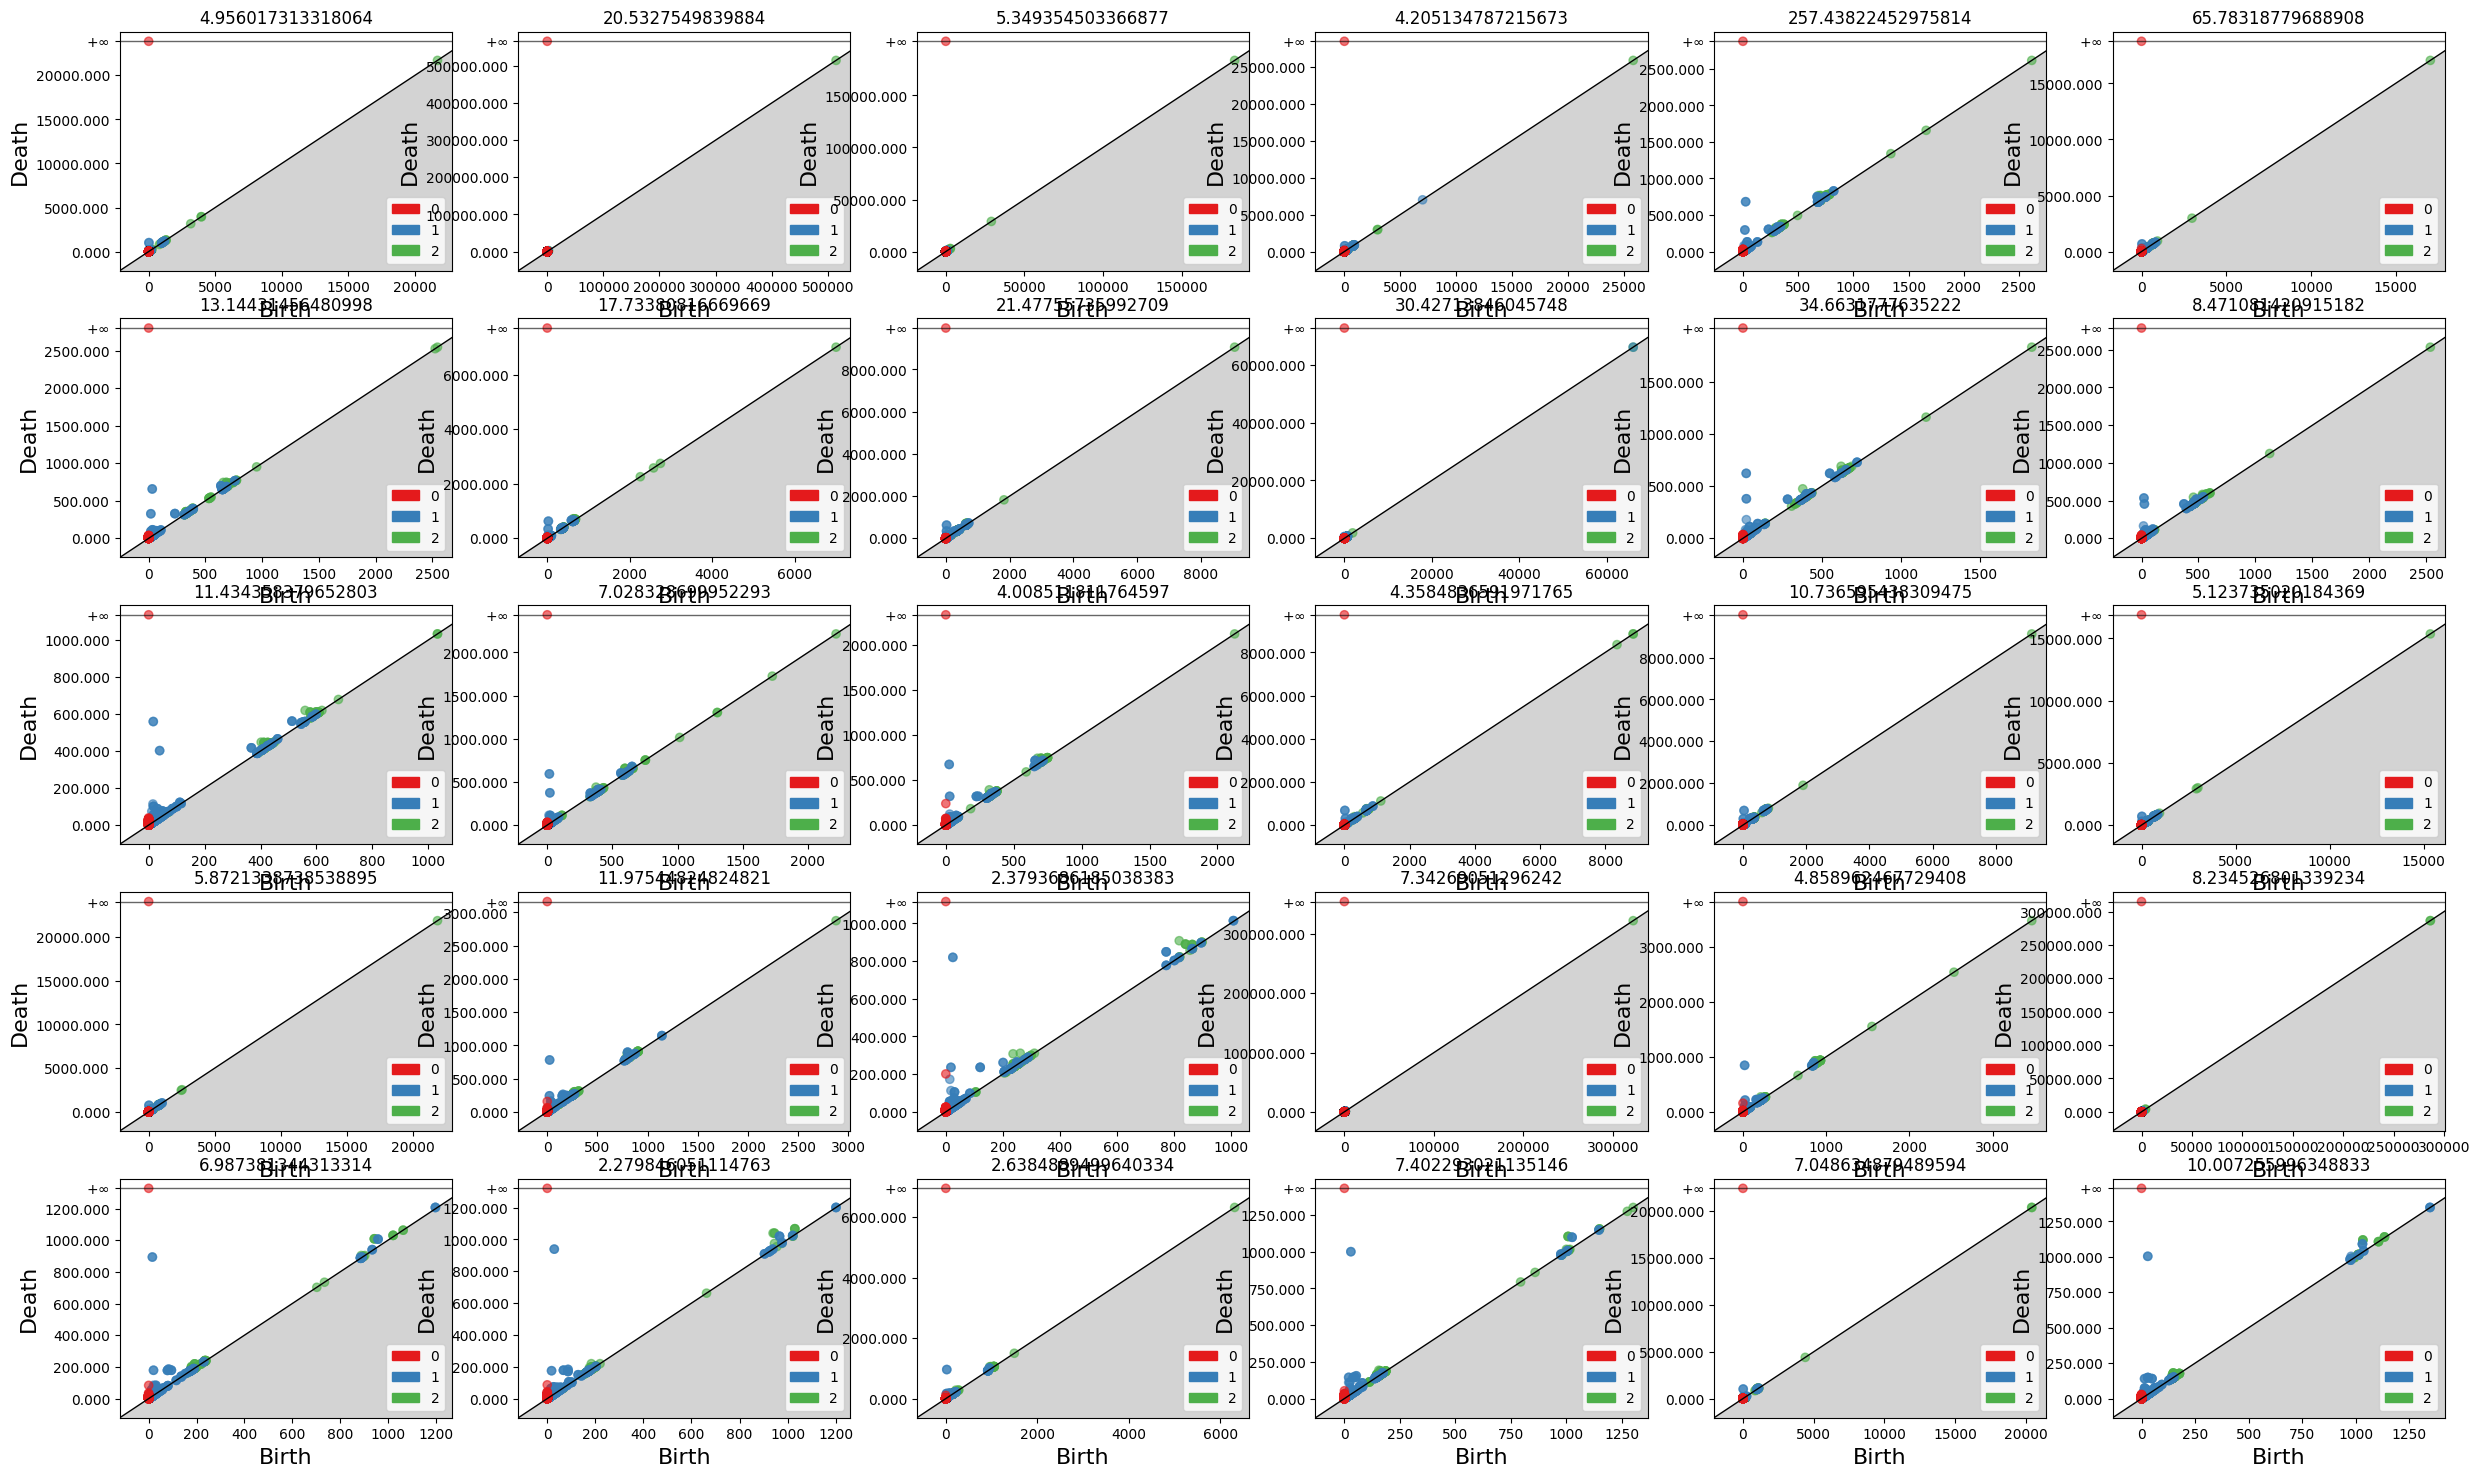

In [72]:
fig, axes = plt.subplots(figsize=(30,18), ncols=6, nrows=5)
axes = axes.flatten()
for i in range(size):
    gd.plot_persistence_diagram(dgms[i], axes=axes[i])
    axes[i].set_title(porosity_list_Gyroid[i])